In [1]:
import matplotlib.pyplot as plt
import simexpal
import yaml

cfg = simexpal.config_for_dir() # load expermiments.yml

results = []
for run in cfg.collect_successful_results():  # load successfull results from output/*
    with run.open_output_file() as f:
        yml = yaml.load(f, Loader=yaml.SafeLoader)
    results.append(yml)

for r in sorted(results, key=lambda r: (r['fill_factor'], r['algo'])):
    print('Algorithm {}, fill factor {} takes: {} ms (insert), {} ms (lookup)'.format(
          r['algo'], r['fill_factor'], r['time_insert'], r['time_lookup']))

Algorithm chaining, fill factor 0.5 takes: 10861 ms (insert), 1927 ms (lookup)
Algorithm linear, fill factor 0.5 takes: 1441 ms (insert), 876 ms (lookup)
Algorithm quadratic, fill factor 0.5 takes: 1555 ms (insert), 927 ms (lookup)
Algorithm robin_hood, fill factor 0.5 takes: 2055 ms (insert), 1175 ms (lookup)
Algorithm stl, fill factor 0.5 takes: 28502 ms (insert), 7219 ms (lookup)
Algorithm chaining, fill factor 0.8 takes: 19884 ms (insert), 3415 ms (lookup)
Algorithm linear, fill factor 0.8 takes: 3996 ms (insert), 2256 ms (lookup)
Algorithm quadratic, fill factor 0.8 takes: 2990 ms (insert), 1753 ms (lookup)
Algorithm robin_hood, fill factor 0.8 takes: 3857 ms (insert), 2032 ms (lookup)
Algorithm stl, fill factor 0.8 takes: 52583 ms (insert), 10823 ms (lookup)
Algorithm chaining, fill factor 0.9 takes: 21780 ms (insert), 3737 ms (lookup)
Algorithm linear, fill factor 0.9 takes: 3313 ms (insert), 1887 ms (lookup)
Algorithm quadratic, fill factor 0.9 takes: 3606 ms (insert), 2095 ms 

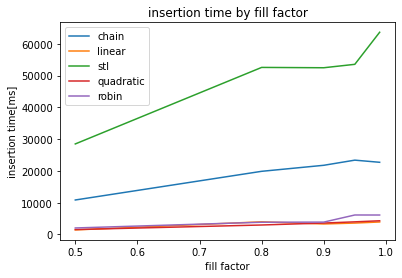

In [3]:
def vec(algo, attr):
    filtered_res = list(filter(lambda x: x['algo'] == algo, results))
    return [i[attr] for i in filtered_res]

x = vec('chaining', 'fill_factor')

# plot the insertion
plt.plot(x, vec('chaining', 'time_insert'), label = 'chain')
plt.plot(x, vec('linear', 'time_insert'), label = 'linear')
plt.plot(x, vec('stl', 'time_insert'), label = 'stl')
plt.plot(x, vec('quadratic', 'time_insert'), label = 'quadratic')
plt.plot(x, vec('robin_hood', 'time_insert'), label = 'robin')
plt.title('insertion time by fill factor')
plt.xlabel('fill factor')
plt.ylabel('insertion time[ms]')
plt.legend()
plt.savefig('insert_fill.pdf')
plt.show()

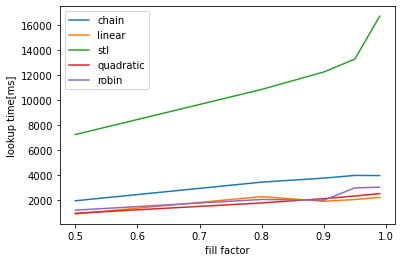

In [4]:
# plot the lookup
plt.plot(x, vec('chaining', 'time_lookup'), label = 'chain')
plt.plot(x, vec('linear', 'time_lookup'), label = 'linear')
plt.plot(x, vec('stl', 'time_lookup'), label = 'stl')
plt.plot(x, vec('quadratic', 'time_lookup'), label = 'quadratic')
plt.plot(x, vec('robin_hood', 'time_lookup'), label = 'robin')
plt.xlabel('fill factor')
plt.ylabel('lookup time[ms]')
plt.legend()
plt.savefig('lookup_fill.pdf')
plt.show()

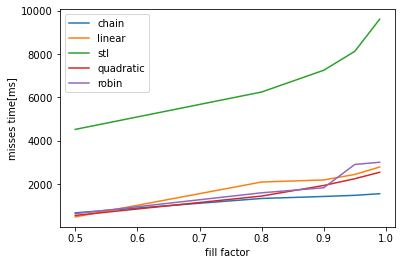

In [9]:
# plot the misses time
plt.plot(x, vec('chaining', 'time_misses'), label = 'chain')
plt.plot(x, vec('linear', 'time_misses'), label = 'linear')
plt.plot(x, vec('stl', 'time_misses'), label = 'stl')
plt.plot(x, vec('quadratic', 'time_misses'), label = 'quadratic')
plt.plot(x, vec('robin_hood', 'time_misses'), label = 'robin')
plt.xlabel('fill factor')
plt.ylabel('misses time[ms]')
plt.legend()
plt.savefig('misses_fill.pdf')
plt.show()